In [1]:
# Importação de Bibliotecas
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
# Leitura de Dados no formato .CSV
bmw = pd.read_csv("bmw.csv", sep=';')
bmw.head() # primeiros 5 registros

,CustomerID,Dealership,Showroom,ComputerSearch,M5,3Series,Z4,Financing,Purchase
0,1,1,0,0,0,0,0,0,0
1,2,1,1,1,0,0,0,1,0
2,3,1,0,0,0,0,0,0,0
3,4,1,1,1,1,0,0,1,1
4,5,1,0,1,1,1,0,1,1


In [3]:
# Informações quantitativas do dataset: 100 linhas e 9 colunas
bmw.shape


(100, 9)

In [19]:
bmw.describe()

,CustomerID,Dealership,Showroom,ComputerSearch,M5,3Series,Z4,Financing,Purchase
count,100.000000,100.000000,100.000000,100.00000,100.000000,100.00,100.00,100.000000,100.000000
mean,50.500000,0.600000,0.720000,0.43000,0.530000,0.55,0.45,0.610000,0.390000
std,29.011492,0.492366,0.451261,0.49757,0.501614,0.50,0.50,0.490207,0.490207
min,1.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.00,0.000000,0.000000
25%,25.750000,0.000000,0.000000,0.00000,0.000000,0.00,0.00,0.000000,0.000000
50%,50.500000,1.000000,1.000000,0.00000,1.000000,1.00,0.00,1.000000,0.000000
75%,75.250000,1.000000,1.000000,1.00000,1.000000,1.00,1.00,1.000000,1.000000
max,100.000000,1.000000,1.000000,1.00000,1.000000,1.00,1.00,1.000000,1.000000


In [4]:
# Para Agrupamento (clustering), feature "id" não é bem-vinda!
# Vamos excluir o CustomerID..Vamos lá !
# Agora ficará: 0.Dealership, 1.Showroom, 2.ComputerSearch, 3.M5, 4.3Series, 5.Z4, 6.Financing, 7.Purchase
Xbmw = bmw.iloc[:, 1:9].values

In [5]:
# Criação do modelo de Agrupamento (Clustering) usando K-Means
# Parametrizando K-Means com 3 Clusters e Metodo de Inicialização Randômica
kmeans = KMeans(n_clusters = 3, init = 'random')
kmeans


KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [6]:
# Treino do modelo com os Dados
kmeans.fit(Xbmw)


KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [7]:
# Exibindo os Centroids - São 3 grupos, portanto, 3 linhas com 8 colunas = 8 features
kmeans.cluster_centers_

array([[ 6.45161290e-02,  1.00000000e+00,  3.54838710e-01,
         3.22580645e-02,  1.00000000e+00,  6.77419355e-01,
         4.51612903e-01,  2.90322581e-01],
       [ 7.66666667e-01,  6.00000000e-01,  4.66666667e-01,
         8.33333333e-01,  3.33333333e-01,  3.00000000e-01,
         1.00000000e+00,  1.00000000e+00],
       [ 8.97435897e-01,  5.89743590e-01,  4.61538462e-01,
         6.92307692e-01,  3.58974359e-01,  3.84615385e-01,
         4.35897436e-01, -1.66533454e-16]])

In [8]:
# Treinando novamente o modelo com os Dados - Observe que novos Centroids são calculados (inicialização randômica!)
kmeans.fit(Xbmw)


KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [9]:
# Exibindo os Centroids - São 3 grupos, portanto, 3 linhas com 8 colunas = 8 features
kmeans.cluster_centers_


array([[ 0.00000000e+00,  1.00000000e+00,  3.10344828e-01,
         3.44827586e-02,  1.00000000e+00,  6.55172414e-01,
         4.82758621e-01,  3.10344828e-01],
       [ 7.95454545e-01,  6.81818182e-01,  4.31818182e-01,
         8.18181818e-01,  3.18181818e-01,  3.86363636e-01,
         1.00000000e+00,  6.81818182e-01],
       [ 9.25925926e-01,  4.81481481e-01,  5.55555556e-01,
         5.92592593e-01,  4.44444444e-01,  3.33333333e-01,
         1.11111111e-01, -5.55111512e-17]])

In [10]:
# Executa K-Means para agrupar os dados e retorna Tabela de Distancias (fit_transform)
# Calcula a distância entre os dados de cada linha (instância) e cada um dos 3 clusters
distance = kmeans.fit_transform(Xbmw)
distance

array([[1.23183714, 1.93629015, 1.87823794],
       [1.24220118, 1.7709648 , 1.54739925],
       [1.23183714, 1.93629015, 1.87823794],
       [1.46916588, 2.11923454, 0.85309893],
       [1.61863734, 2.11923454, 1.12299204],
       [1.30265495, 1.42812539, 1.93074539],
       [1.65001544, 2.13440183, 1.26271313],
       [1.36981645, 1.74342827, 1.9818622 ],
       [1.35096819, 1.46161429, 1.65159855],
       [1.68841822, 2.03379358, 1.288841  ],
       [1.36042496, 1.9279423 , 1.63129124],
       [1.20020818, 2.1494621 , 1.82421977],
       [1.52903092, 2.34332137, 0.96321222],
       [1.33185322, 1.66777625, 1.67165919],
       [1.31245989, 1.90267898, 1.91340302],
       [1.56220987, 1.86846328, 1.03010248],
       [1.65001544, 2.13440183, 1.26271313],
       [1.31245989, 2.03379358, 1.61072792],
       [1.11147266, 1.63850646, 1.73044631],
       [1.06433423, 2.16441757, 1.69148193],
       [1.66548281, 1.78908705, 1.33956875],
       [1.71852267, 2.04959324, 1.41224801],
       [1.

In [11]:
# Para cada uma das 100 linhas do dataset, a qual dos 3 clusters ela pertence..0, 1 ou 2 ?
# São 100 elementos no array, um por linha
labels = kmeans.labels_
labels

array([0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 0, 0, 2, 0, 2, 0, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0,
       0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [12]:
# Exibindo novamente os Centroids (atualizados) - São 3 grupos, portanto, 3 linhas com 8 colunas = 8 features
kmeans.cluster_centers_

array([[ 8.97435897e-01,  5.89743590e-01,  4.61538462e-01,
         6.92307692e-01,  3.58974359e-01,  3.84615385e-01,
         4.35897436e-01, -1.66533454e-16],
       [ 6.45161290e-02,  1.00000000e+00,  3.54838710e-01,
         3.22580645e-02,  1.00000000e+00,  6.77419355e-01,
         4.51612903e-01,  2.90322581e-01],
       [ 7.66666667e-01,  6.00000000e-01,  4.66666667e-01,
         8.33333333e-01,  3.33333333e-01,  3.00000000e-01,
         1.00000000e+00,  1.00000000e+00]])

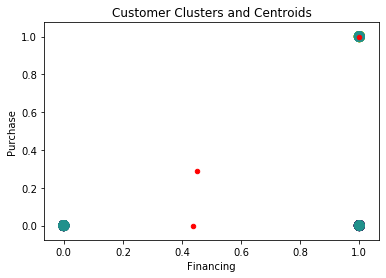

In [13]:
# Visualizando os Clusters - Exemplo 1
# Dados: 0.Dealership, 1.Showroom, 2.ComputerSearch, 3.M5, 4.3Series, 5.Z4, 6.Financing, 7.Purchase
plt.scatter(Xbmw[:, 6], Xbmw[:,7], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 6], kmeans.cluster_centers_[:, 7], s = 20, c = 'red')
plt.title('Customer Clusters and Centroids')
plt.xlabel('Financing')
plt.ylabel('Purchase')
plt.show()

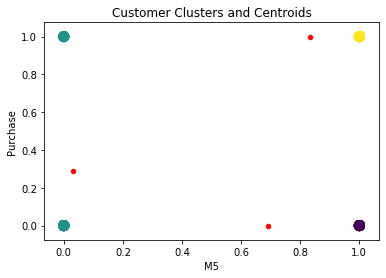

In [14]:
# Visualizando os Clusters - Exemplo 2
# Dados: 0.Dealership, 1.Showroom, 2.ComputerSearch, 3.M5, 4.3Series, 5.Z4, 6.Financing, 7.Purchase
plt.scatter(Xbmw[:, 3], Xbmw[:, 7], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 3], kmeans.cluster_centers_[:, 7], s = 20, c = 'red')
plt.title('Customer Clusters and Centroids')
plt.xlabel('M5')
plt.ylabel('Purchase')
plt.show()


In [15]:
# Cálculo do WCSSE - Within Cluster Sum of Squared Errors
wcsse = []
maxclusters = 11
for i in range(1, maxclusters):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(Xbmw)
    print (i,kmeans.inertia_)
    wcsse.append(kmeans.inertia_)

1 190.66000000000003
2 149.61111111111114
3 127.59750231267347
4 115.2151067323481
5 104.16186868686869
6 93.92049783549784
7 84.28976317799848
8 78.7813492063492
9 73.70983248777367
10 66.93806471306472


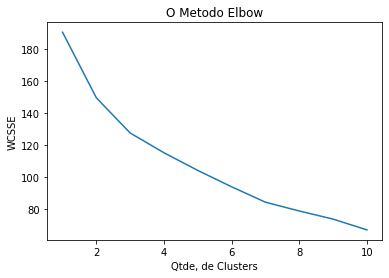

In [16]:
# Plotagem do Gráfico para visualização do "cotovelo" - Método de Elbow
# Ao final do Estudo do Metodo de Elbow a seguir, foram gerados 11 clusters
plt.plot(range(1, maxclusters), wcsse)
plt.title('O Metodo Elbow')
plt.xlabel('Qtde, de Clusters')
plt.ylabel('WCSSE') # Within Cluster Sum of Squares
plt.show()


In [17]:
# Para o cliente 1 => Dealership=1, Showroom=1, ComputerSearch=1, M5=1, 3Series=1,
#                Z4=1, Financing=1, Purchase=1, qual grupo ele pertence?
# O comando predict nos traz o cluster=4
newcustomer1= [ [1, 1, 1, 1, 1, 1, 1, 1] ]
kmeans.predict(newcustomer1)


array([6], dtype=int32)

In [18]:
# Para o cliente 2 => Dealership=1, Showroom=0, ComputerSearch=0, M5=0, 3Series=1,
#                Z4=1, Financing=1, Purchase=1, qual grupo ele pertence?
# O comando predict nos traz o cluster=2
newcustomer2 = [ [1, 0, 0, 0, 1, 1, 1, 1] ]
kmeans.predict(newcustomer2)


array([0], dtype=int32)